In [1]:
# Import libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Process generator for demand
def generate_demand():
    r = np.random.rand()
    if r < 0.13:
       return 2
    elif r < 0.55:
       return 3
    else:
       return 5

In [3]:
def generate_lead_time():
    r = np.random.exponential(scale=4)
    lead_time = 5 + r
    return(lead_time)

In [4]:
num_runs = 10
samples_P = np.zeros(num_runs)
for i in range(num_runs):
    # Initialize state 
    t = 0.0
    N = 40
    P = 0
    t_d = float('inf')
    
    
    obs_time = []
    inventory = []
    penalty = []
    
    # Simulate 260 days
    while t < 260.0:
        # Generate demand 
        d = generate_demand()
        # Update invetory level
        N -= d
        # Add penalty
        if N < 0:
            P -= N
        # Check if a new order is necessary
        if N < 30 and t_d == float('inf'):
            # Schedule order
            t_d = t + generate_lead_time()
        # Check if order has been delivered
        if t_d <= t + 1:
            N += 40
            t_d = float('inf')
        t += 1
        
        obs_time.append(t)
        inventory.append(N)
        penalty.append(P)
    
    samples_P[i] = P

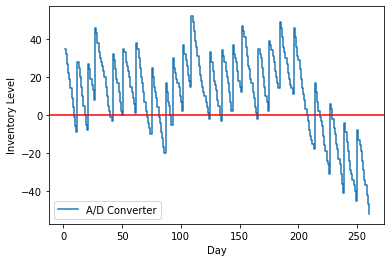

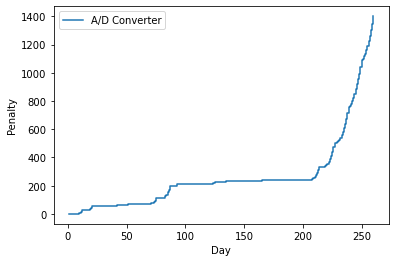

In [5]:
# Generate plots for the most recent sample (out of 10)

# Plot the inventory over time
plt.figure()
plt.step(obs_time, inventory, where='post', label='A/D Converter')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Inventory Level')
plt.legend(loc='best')

# Plot the penalty over time
plt.figure()
plt.step(obs_time, penalty, where='post', label='A/D Converter')
plt.xlabel('Day')
plt.ylabel('Penalty')
plt.legend(loc='best')


In [6]:
print(f'95% confidence interval for P for {num_runs} simulation runs = [{np.mean(samples_P)-1.96*stats.sem(samples_P):.2f}, {np.mean(samples_P)+1.96*stats.sem(samples_P):.2f}]')

95% confidence interval for P for 10 simulation runs = [692.78, 2416.02]
